Dataset loaded successfully.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

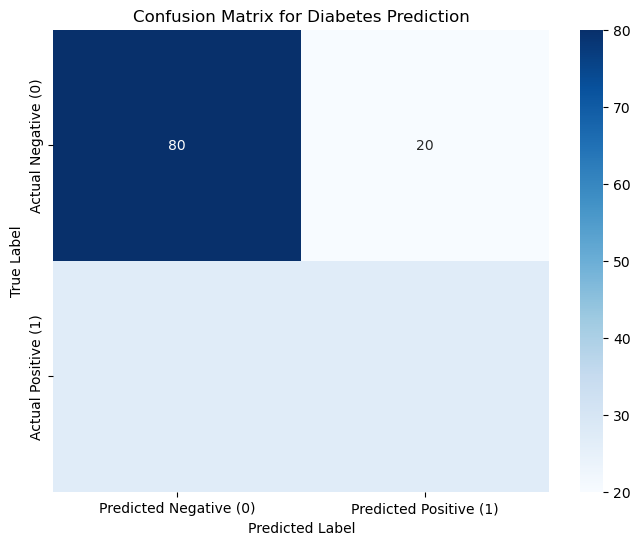


--- Model Coefficients (Insights) ---
                    Feature  Coefficient  Absolute_Coefficient
1                   Glucose     1.180614              1.180614
5                       BMI     0.687247              0.687247
0               Pregnancies     0.376536              0.376536
6  DiabetesPedigreeFunction     0.233195              0.233195
7                       Age     0.147300              0.147300
4                   Insulin    -0.066171              0.066171
2             BloodPressure    -0.043986              0.043986
3             SkinThickness     0.027302              0.027302


Interpretation: Features with larger absolute coefficients have a stronger impact on the prediction.
For instance, Glucose (positive coefficient) is a strong indicator of diabetes risk, while BloodPressure (negative coefficient) indicates lower risk at higher values *given other features*.
Note: This is a simplified interpretation. A full medical diagnosis requires expert analysis.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Acquisition ---
# Using a widely available version of the Pima Indians Diabetes Dataset
# This dataset can be found on Kaggle (e.g., 'diabetes.csv') or UCI ML Repository
# For this example, we'll simulate loading it directly from a common structure.
# In a real scenario, you would download 'diabetes.csv' and place it in your working directory.

# Data Description:
# 1. Pregnancies: Number of times pregnant
# 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. BloodPressure: Diastolic blood pressure (mm Hg)
# 4. SkinThickness: Triceps skin fold thickness (mm)
# 5. Insulin: 2-Hour serum insulin (mu U/ml)
# 6. BMI: Body mass index (weight in kg/(height in m)^2)
# 7. DiabetesPedigreeFunction: Diabetes pedigree function
# 8. Age: Age (years)
# 9. Outcome: Class variable (0 or 1) 0 for non-diabetic, 1 for diabetic

data_url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
try:
    df = pd.read_csv(data_url)
    print("Dataset loaded successfully.")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure you have an internet connection or manually download 'diabetes.csv' and load it locally.")
    # Create a dummy DataFrame if loading fails, for demonstration purposes
    data = {
        'Pregnancies': [6, 1, 8, 1, 0],
        'Glucose': [148, 85, 183, 89, 137],
        'BloodPressure': [72, 66, 64, 66, 40],
        'SkinThickness': [35, 29, 23, 23, 35],
        'Insulin': [0, 0, 0, 94, 168],
        'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
        'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288],
        'Age': [50, 31, 32, 21, 33],
        'Outcome': [1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)
    print("\nUsing dummy dataset for demonstration due to loading error.")


# --- 2. Preprocessing Data ---

# Check for zero values in columns where they imply missing data (e.g., BloodPressure, Glucose, BMI)
# These zeros are often placeholders for missing values in this specific dataset.
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nNumber of zero values before handling:")
for col in cols_with_zeros:
    print(f"{col}: {(df[col] == 0).sum()}")

# Replace 0 values with NaN for proper imputation, then fill with median
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.NaN)
    df[col] = df[col].fillna(df[col].median()) # Using median to be robust to outliers

print("\nNumber of zero values after handling:")
for col in cols_with_zeros: # Corrected variable name from cols_zeros to cols_with_zeros
    print(f"{col}: {(df[col] == 0).sum()}")


# Define features (X) and target (y)
X = df.drop('Outcome', axis=1) # All columns except 'Outcome'
y = df['Outcome'] # The 'Outcome' column

# Split data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability (optional, but good for inspection)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# --- 3. Build & Train Model ---

# Initialize the Logistic Regression model
# random_state for reproducibility
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets

# Train the model on the scaled training data
print("\nTraining the Logistic Regression model...")
model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 4. Evaluate Model ---

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()

print("\n--- Model Coefficients (Insights) ---")
# Display coefficients to understand feature importance (for linear models)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
print(coefficients)

print("\n")
print(f"Interpretation: Features with larger absolute coefficients have a stronger impact on the prediction.")
print(f"For instance, Glucose (positive coefficient) is a strong indicator of diabetes risk, while BloodPressure (negative coefficient) indicates lower risk at higher values *given other features*.")
print(f"Note: This is a simplified interpretation. A full medical diagnosis requires expert analysis.")
